<a href="https://colab.research.google.com/github/Ware-Hard-or-Soft/ML-DL-projects/blob/main/ML_DL_Training_and_Testing_Basics_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML/DL Basics and Application
# By David Zheng

 **Build a classifier by using neural network**.  
 Pytorch is a popular ML library in Python and is implemented in C and wrapped with Lua. It offers **Tensor Computation**. It works just like **Numpy**, but has faster computation and allows for GPU acceleration.




In [1]:
import torch

print(f'-----------Tensor Initialization-----------')
# Tensor initilization
A = torch.zeros(2,2)
print(f'Zero initialization for A: \nA={A}\n')

A = torch.randn(2,2)
print(f'normal distributrion initialization for A: \nA={A}\n')

print(f'-----------   Tensor Addition    -----------')
# Tensor addition
A, B = [1,2,3], [3,2,1]
A, B = torch.tensor(A), torch.tensor(B)
print(f'Tensor A is {A}, Tensor B is {B}')
print(f'Tensor addition: \nA+B={A+B}\n')

print(f'-----------Tensor Initialization-----------')
# Tensor indexing and slicing
A = torch.ones(3,3)
print(f'A is defined as \n{A}\n')
print(f'The first element :\n{A[0,0]}\n')
print(f'The first two columns :\n{A[:,0:2]}\n')

print(f'-----------  Tensor Information-----------')
# Tensor information
A = torch.rand(3,3)
print(f'A has shape: \n{A.size()}\n')
print(f'A has datatype: \n{A.dtype}\n')
print(f'A is stored as: \n{A.type()}\n')

-----------Tensor Initialization-----------
Zero initialization for A: 
A=tensor([[0., 0.],
        [0., 0.]])

normal distributrion initialization for A: 
A=tensor([[-0.9946, -1.6341],
        [-0.3376,  0.4029]])

-----------   Tensor Addition    -----------
Tensor A is tensor([1, 2, 3]), Tensor B is tensor([3, 2, 1])
Tensor addition: 
A+B=tensor([4, 4, 4])

-----------Tensor Initialization-----------
A is defined as 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

The first element :
1.0

The first two columns :
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

-----------  Tensor Information-----------
A has shape: 
torch.Size([3, 3])

A has datatype: 
torch.float32

A is stored as: 
torch.FloatTensor



For more information, please refer to the Pytorch official tutorial : [Pytorch Tutorial](https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html)

##  Getting datasets from torchvision
torchvision offers some popular datasets which is available for download only by writing a few lines of code. The avaliable datasets are MNIST, FMNIST, LSUN, CIFAR, etc. More information on the dataset is available here: [Torchvision dataset](https://pytorch.org/vision/stable/datasets.html)


There are several parameters when you trying to get MNIST data from torchvision by using the function `torchvision.dataset.MNIST()`:


*   train : This parameter indicates whether you want the training set or the testing set
*   download: Set True to start download from the website
*   transform: pre-processing functions for the dataset

Here is a typical setup:

In [2]:
import torchvision

"""
Here the transform is a pipeline containing two seperate transforms:
1. Transform the data into tensor type
2. Normalize the dataset by a giving mean and std.
  (Those number is given as the global mean and standard deviation of MNIST dataset)
"""
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)

print(train_dataset)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17810569.57it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 481017.88it/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4432649.96it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2938989.32it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: /data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


Then we need to set up a **getter** for the dataset by using the function `torch.utils.data.DataLoader()`, some parameters is given as:

*   batch_size: how many datasets you want each time
*   shuffle: whether the extracted data are shuffled from the dataset




In [3]:
batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

print(train_loader)

Here the train_loader/test_loader is an iterable, we can extract by using the python built-in function `next()`

current batch index is 0
images has shape torch.Size([64, 1, 28, 28])
targets has shape torch.Size([64])


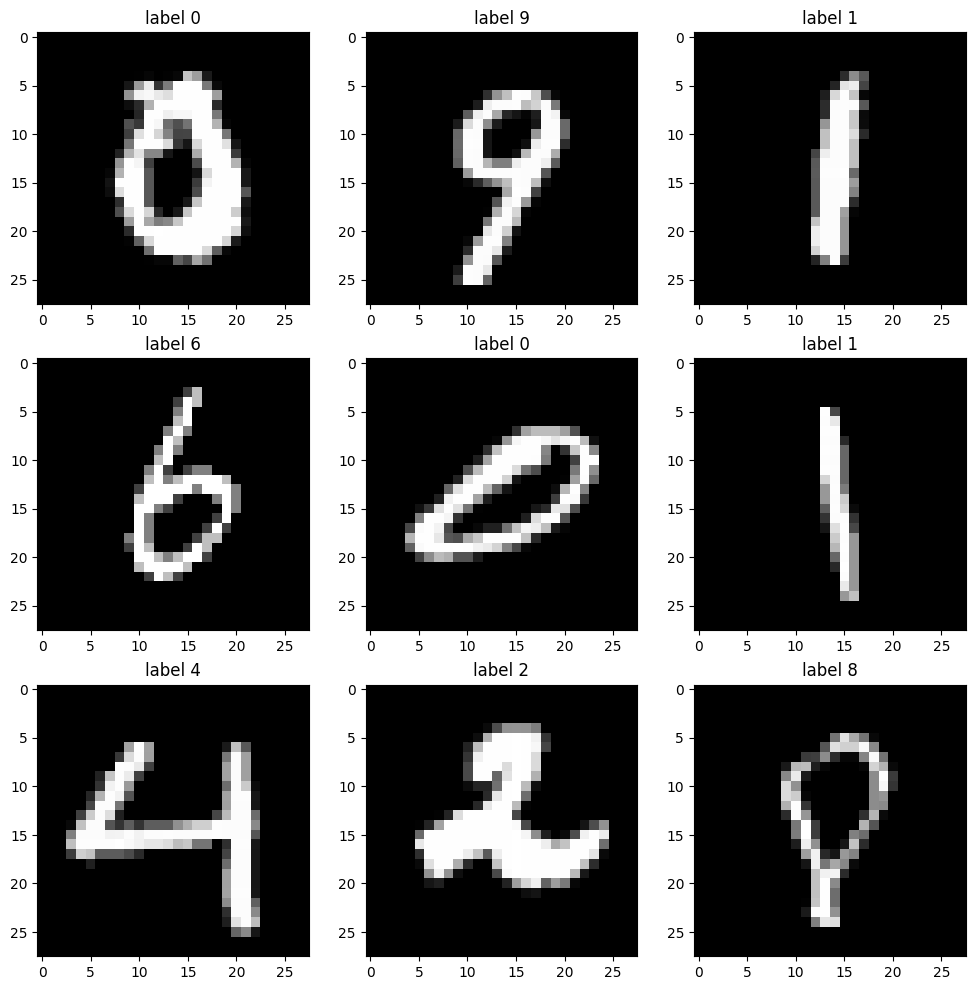

In [4]:
batch_idx, (images, targets) = next(enumerate(train_loader))
print(f'current batch index is {batch_idx}')
print(f'images has shape {images.size()}')
print(f'targets has shape {targets.size()}')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images[i*3+j][0], cmap='gray')
    ax[i,j].set_title(f'label {targets[i*3+j]}')
fig.show()

**Important Note:** In PyTorch, image files are stored in the format of (Batchsize x Channel x Height x Width)  
We can visualize the first few images and its associated labels like this:

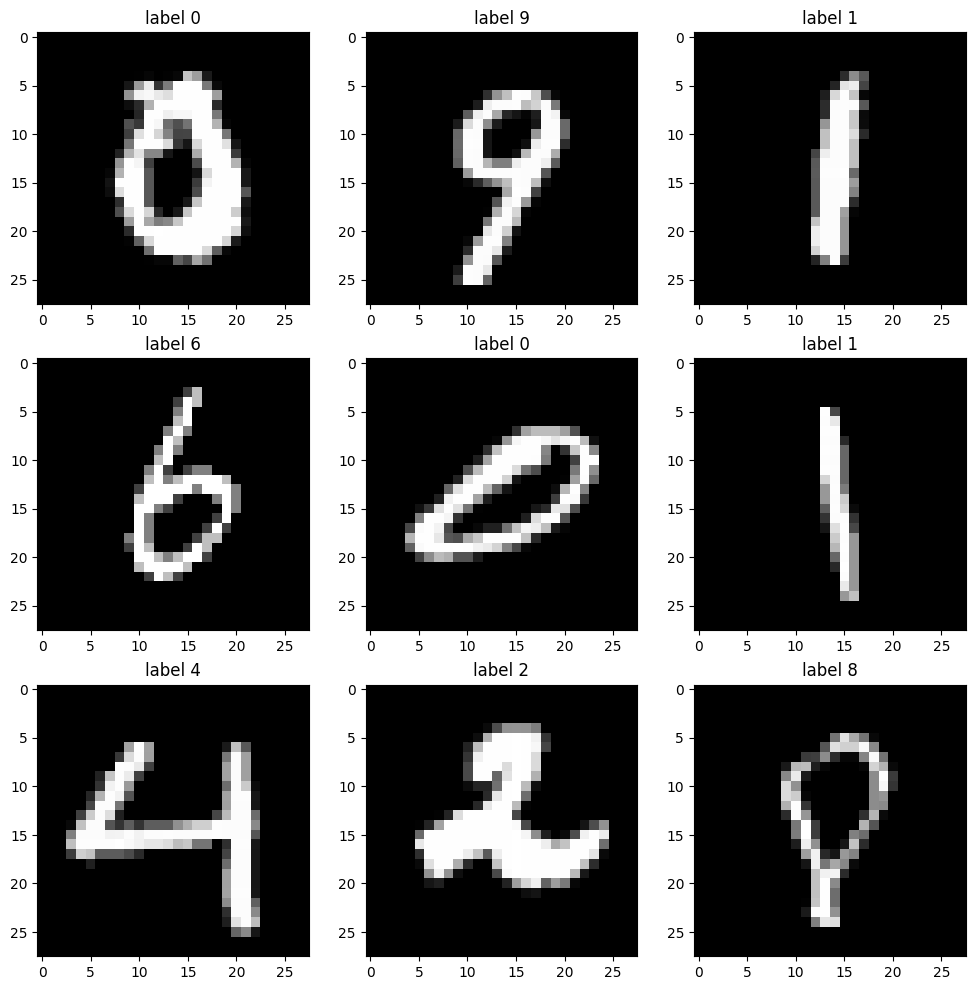

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images[i*3+j][0], cmap='gray')
    ax[i,j].set_title(f'label {targets[i*3+j]}')
fig.show()

## Building the neural network structure

*   fully connected layers: `nn.Linear(input_dim, output_dim)`
*   convolution layers: `nn.Conv2d(input_channel, output_channel, kernel_size)`
*   Relu function: `F.relu(input_)`
*   max pooling: `F.max_pool2d(input_, kernal_size)`
*   log softmax: `F.log_soft_max(input_)`

More details on this functions are listed here:
[torch.nn.*](https://pytorch.org/docs/stable/nn.html)
[torch.nn.functional.*](https://pytorch.org/docs/stable/nn.functional.html)





In [6]:
import torch.nn as nn
import torch.nn.functional as F

class OurNN(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(OurNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)

  def forward(self, x):
    x = self.conv(x)        # x now has shape (batchsize x 3 x 24 x 24)
    x = F.relu(F.max_pool2d(x,2))  # x now has shape (batchsize x 3 x 12 x 12)
    x = x.view(-1, 432)      # x now has shape (batchsize x 432)
    x = F.relu(self.fc(x))     # x has shape (batchsize x 10)
    return F.log_softmax(x,-1)

Note: Always keep track of the dimension of the **x** throughout the neural network. The dimension can easily get mis-mismatched due to the parameter setup for various layers.

We further need to set up an optimizer to help us backprop the network and learn all its parameters. We use the stochastic gradient descent optimizer: `optim.SGD(model, lr, momentum)`

In [7]:
import torch.optim as optim

classifier = OurNN()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)

## Training/Test our neural network

Generally we need a training function `train()` that completes the following tasks:

1.   init our optimizer
2.   get batches of data
3.   feed forward the data into our network
4.   compute the loss between the output of our network and actual label
5.   move a step on the gradient by optimizer
6.   output some visual information on what we do

Also for the test function `test()`, we have the following tasks:

1.   get batches of data
2.   feed forward the data into our network
3.   compute the loss between the output of our network and actual label
4.   calculate our correctness of the output
5.   save and output some inforamtion on what we do

Here is the code for how we might implement the ideas:



In [8]:
def train(classifier, epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier, epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples

  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [9]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(classifier, epoch)
  test(classifier, epoch)


Epoch 1: [0/60000] Loss: 2.3551034927368164
Epoch 1: [6400/60000] Loss: 1.3725825548171997
Epoch 1: [12800/60000] Loss: 1.4445741176605225
Epoch 1: [19200/60000] Loss: 1.4051010608673096
Epoch 1: [25600/60000] Loss: 1.4391471147537231
Epoch 1: [32000/60000] Loss: 0.9871620535850525
Epoch 1: [38400/60000] Loss: 0.9974980354309082
Epoch 1: [44800/60000] Loss: 0.8855990171432495
Epoch 1: [51200/60000] Loss: 0.7543586492538452
Epoch 1: [57600/60000] Loss: 0.9747160077095032
Test result on epoch 1: Avg loss is 0.8828075317382813, Accuracy: 73.70999908447266%
Epoch 2: [0/60000] Loss: 1.0050941705703735
Epoch 2: [6400/60000] Loss: 0.8895613551139832
Epoch 2: [12800/60000] Loss: 0.7741289734840393
Epoch 2: [19200/60000] Loss: 0.718956708908081
Epoch 2: [25600/60000] Loss: 1.1015135049819946
Epoch 2: [32000/60000] Loss: 1.0641252994537354
Epoch 2: [38400/60000] Loss: 0.6079562306404114
Epoch 2: [44800/60000] Loss: 0.8476735949516296
Epoch 2: [51200/60000] Loss: 0.7466282248497009
Epoch 2: [5760

This simple neural network already achieves an overall accuracy of 87.77%. (Note: random guesses would have an accuracy of 10%)

## Visualiaze our result
Here we plot our loss function graph and some of our predictions:  
Loss w

Text(0, 0.5, 'negative log likelihood loss')

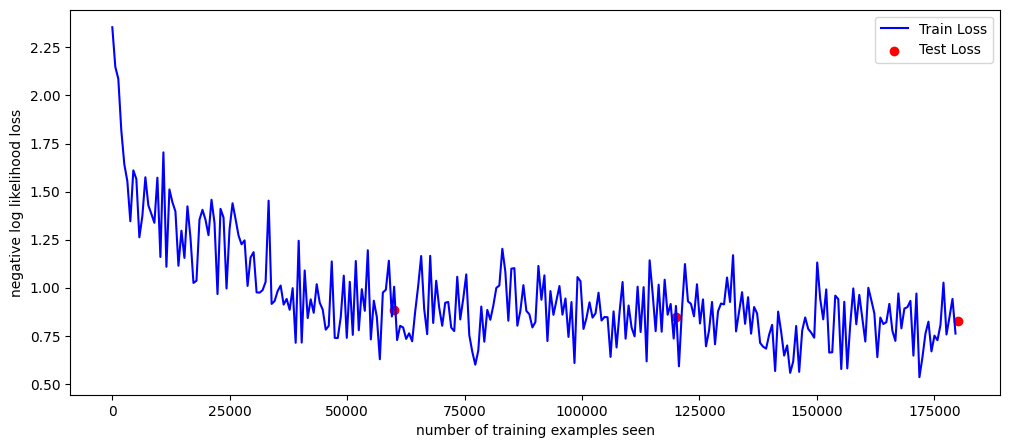

In [10]:
fig = plt.figure(figsize=(12,5))
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Judging from our loss graph, our network actually converges at only 1 epoch.  

